## Project plaaning stage (Individual)

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_url <- "https://raw.githubusercontent.com/Yitong425/project_proposal/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/Yitong425/project_proposal/refs/heads/main/sessions.csv"

In [3]:
players <- read_csv(players_url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
sessions <- read_csv(sessions_url)
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## 1. Data Description
The data set consists of two files： `players.csv`，which contains information about individual players. `sessions.csv`, which records each player's gaming sessions. These datasets provide insights into player behaviors, experience levels, and engagement trends. 

First, let's have a look at `players.csv` dataset. It contains 196 players and has 7 variables.

- `experience`: represnets the player's experience level (e.g., Pro, Veteran, Amateur).
- `subscribe`: indicate whether the player subscribes to the newsletter.
- `hashedEmail`: a unique identifier for players (hashed for privacy).
- `played_hours`: the total number of hours the player has played.
- `name`: the player's first name
- `gender`: the player's gender
- `Age`: the player's age

There are also some issues in the dataset. 

- `Age` has some missing values.
- `played_hours` contains zero, which might indicate inactive players.

Next, let's have a look at `sessions.csv` dataset. It contains 1535 players and has 5 variables.

- `hashedEmail`: a unique identifier for players (hashed for privacy).
- `start_time`: the start time of a gaming session
- `end_time`: the end time of a gaming session
- `original_start_time`: the start time in UNIX timestamp format (converted to readable format)
- `original_end_time`: the end time in UNIX timestamp format (converted to readable format)

There are also some issues in the dataset. 

- `end_time` has some missing values.
- `start_time` and `end_time` were initially stored as strings instead of datetime format, requiring conversation.

## 2. Questions
The broad question I aim to explore is "We would like to know which 'kinds' of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts." Specifically, I will examine whether a player's age significantly imapcts total playtime. 

The specific question I have formulated is "Does a play's age (`Age`) influence their total playtime (`palyed_hours`) in the dataset? The response variable is `played_hours`, representing total time played, and the explanatory variable is `Age`.

To address this, I will analyze the `players.csv` dataset. First, I will ensure `Age`and `palyed_hours` are in numeric format and handle missing values, imputing where necessary. Next step will be the data analysis, including summary statistics and scatterplots, to identify trends. Finally, I will apply linear regression, with `Age` as the predictor and `palyed_hours` as the response variable.

## 3. Exploratory Data Analysis and Visulization

I loaded `players.csv` earlier, therefore, I will perform the necessary wrangling, compute the mean value for each quantitative variable in the `players.csv` dataset, and create visualizations. 

In [9]:
# Minimum necessary wrangling
players <- players |>
mutate(Age = as.numeric(Age),
       played_hours = as.numeric(played_hours)) 
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [10]:
# Compute mean values 
mean_values <- players |>
summarise(mean_played_hours = mean(played_hours, na.rm = TRUE),
          mean_age = mean(Age, na.rm = TRUE))
mean_values

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


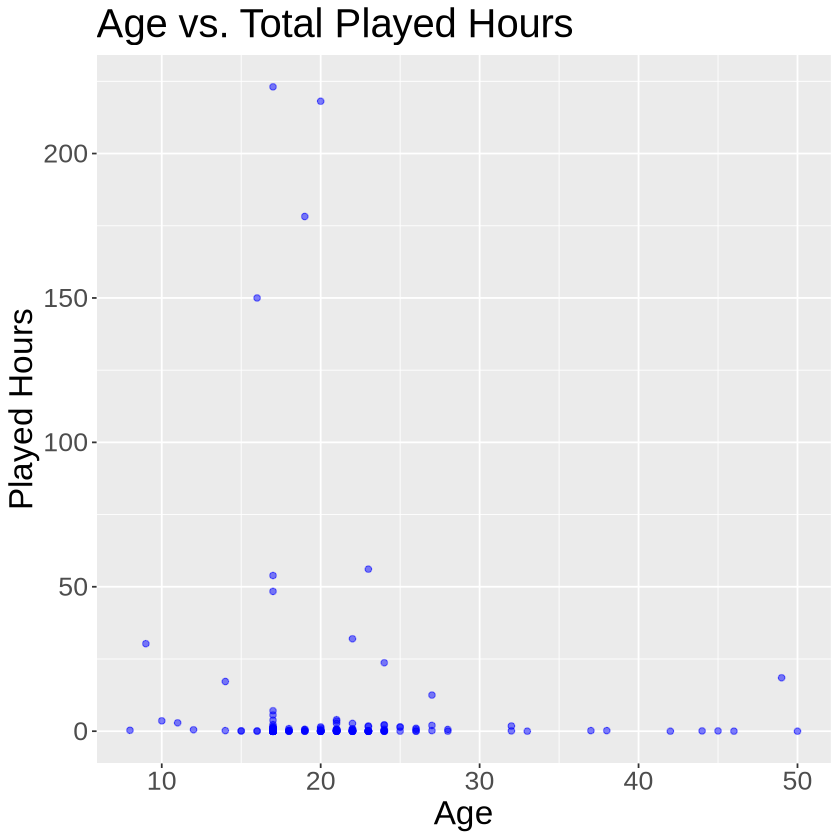

In [11]:
# Visualizations
plot_1 <- ggplot(players, aes(x = Age, y = played_hours)) +
           geom_point(alpha = 0.5, color = "blue") +
           labs(title = "Age vs. Total Played Hours",
                x = "Age",
                y = "Played Hours") +
           theme(text = element_text(size = 20))
plot_1

Observations from `plot_1`:

- Most playesr have low played hours, but a few outliers have hight played hours.
- Mojority of players are aged 10 - 30, with few older players.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


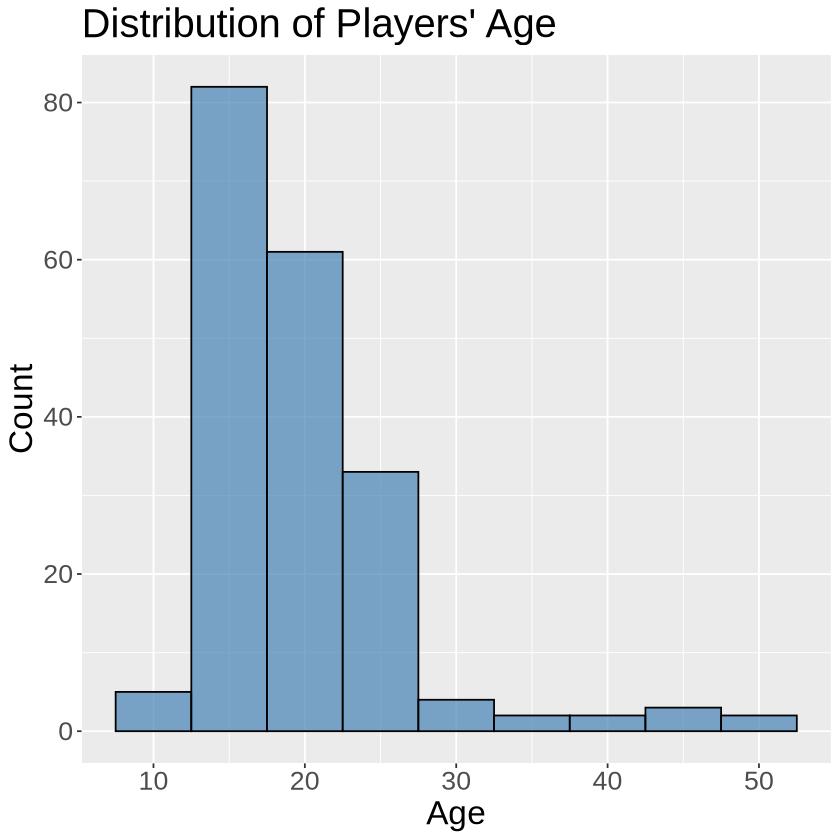

In [12]:
#Visulizations
plot_2 <- ggplot(players, aes(x = Age)) +
          geom_histogram(binwidth = 5, fill = "steelblue", color = "black", alpha = 0.7) +
          labs(title = "Distribution of Players' Age",
               x = "Age",
               y = "Count") +
          theme(text = element_text(size = 20))
plot_2

Observations from `plot_2`:

- Most players are young, the highest concentration of players is between 10 - 25 years old.
- The largest grorup is around 15 - 20 years old.
- The distribution is right-skewed, meaning most players are yourger, while older ages are underrepresented.

# 4. Methods and Plan

The method I selected for addressing the research question is linear regression, where `Age` is the explanatory variable and `played_hours` is the response variable. This method is appropriate because it quantifies the relationship between age and playtime, allowing me to determine if age significantly influences player engagement. My primary assumption is the `played_hours` changes proportionally with `Age`. 

One limitation is potential outliers, as some players have extremely high playtime, which could skew results. To avoid or eliminate this, according to the research, I may use quantile regression techniques. The dataset will be split into 80% training and 20% testing to ensure generalizability. Cross-validation will further validate performance and minimize overfitting. I will split the data before fitting the regression model. This approach ensures a rigorous, data-driven conclusion about how age affects playtime.
